In [1]:
import os
import torch
import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

In [2]:
font = {
        'weight' : 'normal',
        'size'   : 18
        }
matplotlib.rc('font', **font)

In [3]:
k = 1024 # size of nonlinear layer
log2_batch_size = 13
log2_training_steps = 18
sample_kind = 'equal'
# init_bias = 0.0
nonlinearity = 'ReLU'
task = 'autoencoder'
# decay = 0.0
eps = 0.015625
m = 64 # input dimensions
N = 512 # number of features
reg = 0.0
# lr = 0.03

In [4]:
lrs = [0.001, 0.003, 0.005, 0.007, 0.01, 0.03]

In [5]:
sdc2s = []
m3s = []
for lr in lrs:
#     model = 'soft_dot_choose_2_penalised_model'
    model = 'soft_dot_penalised_model'
    init_bias = 0.0
    decay = 0.0
    n = f"../my_models/{model}_{task}_{nonlinearity}_k_{k}_batch_{log2_batch_size}_steps_{log2_training_steps}_learning_rate_{lr}_sample_{sample_kind}_init_bias_{init_bias}_decay_{decay}_eps_{eps}_m_{m}_N_{N}_reg_{reg}.pt"
    sdc2s.append(torch.load(n, map_location=torch.device('cpu')))
    model = 'model3'
    init_bias = -1.0
    decay = 0.03
    n = f"../my_models/{model}_{task}_{nonlinearity}_k_{k}_batch_{log2_batch_size}_steps_{log2_training_steps}_learning_rate_{lr}_sample_{sample_kind}_init_bias_{init_bias}_decay_{decay}_eps_{eps}_m_{m}_N_{N}_reg_{reg}.pt"
    m3s.append(torch.load(n, map_location=torch.device('cpu')))

In [6]:
m3s[0]['losses']

[2.6769466400146484,
 2.678656816482544,
 2.680039405822754,
 2.657904624938965,
 2.664320707321167,
 2.6909022331237793,
 2.6755146980285645,
 2.67995548248291,
 2.69863224029541,
 2.667400360107422,
 2.6650171279907227,
 2.6643424034118652,
 2.6686952114105225,
 2.6585443019866943,
 2.67301869392395,
 2.6720571517944336,
 2.6764731407165527,
 2.6635663509368896,
 2.6566643714904785,
 2.6365156173706055,
 2.665736436843872,
 2.646303176879883,
 2.6491892337799072,
 2.656702995300293,
 2.6578969955444336,
 2.630964517593384,
 2.646584987640381,
 2.6437528133392334,
 2.63443660736084,
 2.6351780891418457,
 2.635017156600952,
 2.669703960418701,
 2.656773567199707,
 2.6588613986968994,
 2.681619644165039,
 2.6471123695373535,
 2.6625452041625977,
 2.6394100189208984,
 2.6579718589782715,
 2.6776113510131836,
 2.649479866027832,
 2.6443119049072266,
 2.640918254852295,
 2.6627936363220215,
 2.633129119873047,
 2.62814998626709,
 2.651190757751465,
 2.6296403408050537,
 2.61152982711792,
 

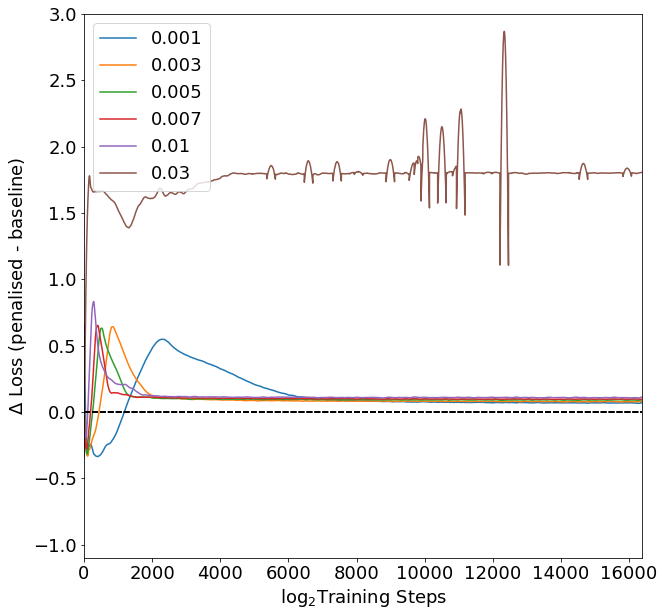

In [27]:
plt.figure(figsize=(10,10))
for i in range(len(sdc2s)):
    # smoothing - https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-for-a-dataset
    diff = savgol_filter([sdc2s[i]['losses'][j] - m3s[i]['losses'][j] for j in range(len(m3s[i]['losses']))], 251, 3)
    plt.plot(range(len(m3s[i]['losses'])), diff, '-', label=lrs[i])
    plt.plot(range(len(m3s[i]['losses'])), [0 for _ in range(len(m3s[i]['losses']))], 'k--')
# plt.yscale('log')
plt.xlabel(r'$\log_2 \mathrm{Training\ Steps}$')
plt.ylabel(r'$\Delta$ Loss (penalised - baseline)')
plt.xlim(0,len(m3s[i]['losses'])+1)
plt.ylim(-1.1, 3.0)
plt.legend(loc='upper left')
plt.show()

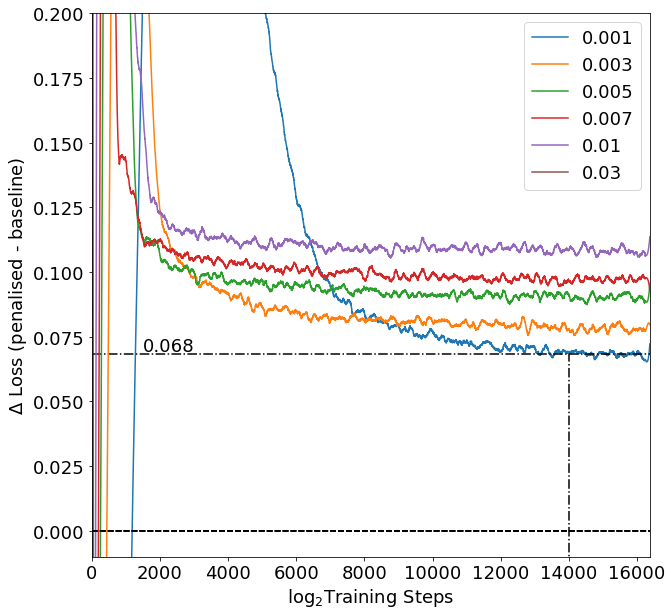

In [26]:
plt.figure(figsize=(10,10))
for i in range(len(sdc2s)):
    # smoothing - https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-for-a-dataset
    diff = savgol_filter([sdc2s[i]['losses'][j] - m3s[i]['losses'][j] for j in range(len(m3s[i]['losses']))], 251, 3)
    plt.plot(range(len(m3s[i]['losses'])), diff, '-', label=lrs[i])
    plt.plot(range(len(m3s[i]['losses'])), [0 for _ in range(len(m3s[i]['losses']))], 'k--')
    if i == 0:
        plt.plot([0, 16500], [np.mean(diff[14000:]), np.mean(diff[14000:])], 'k-.')
        plt.plot([14000, 14000], [-1.1, np.mean(diff[14000:])], 'k-.')
        plt.text(1500, np.mean(diff[14000:])+0.02*np.mean(diff[14000:]), '%.3f'%(np.mean(diff[14000:])))
# plt.plot([0, 6500], [np.mean(diff[6500:]), np.mean(diff[6500:])], 'k-.')
# plt.plot([6500, 6500], [-1.1, np.mean(diff[6500:])], 'k-.')
# plt.text(1000, np.mean(diff[6500:])+0.02*np.mean(diff[6500:]), '%.3f'%(np.mean(diff[6500:])))
# plt.yscale('log')
plt.xlabel(r'$\log_2 \mathrm{Training\ Steps}$')
plt.ylabel(r'$\Delta$ Loss (penalised - baseline)')
plt.xlim(0,len(m3s[i]['losses'])+1)
plt.ylim(-0.01, 0.2)
plt.legend(loc='upper right')
plt.show()

### Mean activating neurons comparison

In [8]:
for lr in lrs:
#     model = 'soft_dot_choose_2_penalised_model'
    model = 'soft_dot_penalised_model'
    init_bias = 0.0
    decay = 0.0
    root = f'../my_plots/{model}_{task}_{nonlinearity}_k_{k}_batch_{log2_batch_size}_steps_{log2_training_steps}_sample_{sample_kind}_init_bias_{init_bias}_decay_{decay}_eps_{eps}_m_{m}_N_{N}_reg_{reg}/'
    d = pd.read_csv(os.path.join(root, 'learning_rate_'+str(lr), 'neurons_to_features_report.csv'))
    model = 'model3'
    init_bias = -1.0
    decay = 0.03
    root = f'../my_plots/{model}_{task}_{nonlinearity}_k_{k}_batch_{log2_batch_size}_steps_{log2_training_steps}_sample_{sample_kind}_init_bias_{init_bias}_decay_{decay}_eps_{eps}_m_{m}_N_{N}_reg_{reg}/'
    md = pd.read_csv(os.path.join(root, 'learning_rate_'+str(lr), 'neurons_to_features_report.csv'))
    print(lr, md['n_activating_features'].mean(), d['n_activating_features'].mean(), md['n_activating_features'].max(), d['n_activating_features'].max())

0.001 50.4423828125 0.5009765625 512 1
0.003 46.0693359375 0.5 512 1
0.005 44.2392578125 0.5 512 1
0.007 41.1875 0.5 512 1
0.01 39.109375 0.5 512 1
0.03 34.853515625 0.0 512 0
